In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [71]:
from sklearn.model_selection import train_test_split          #Split Data into train-test
from sklearn.ensemble import RandomForestClassifier as Rf     #RandomForestClassifer
from sklearn.preprocessing import LabelEncoder                #label encoder to change value

In [47]:
from sklearn.metrics import confusion_matrix            # consfusion matrix for true positive
from sklearn.metrics import accuracy_score            # accuracy score
from sklearn.metrics import classification_report

In [3]:
df_train = pd.read_csv("train/train.csv")

In [4]:
df_train.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,Fiscal,2017,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2905,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,Fiscal,2014,6,General Administration & Finance,ASR,ASR Assessor / Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4200,...,4222,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,Fiscal,2014,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2910,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,Fiscal,2014,1,Public Protection,FIR,FIR Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,...,H002,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,Fiscal,2013,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",1600,...,1224,Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [5]:
df_train.isnull().sum()

ID                         0
Year Type                  0
Year                       0
Organization Group Code    0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family Code            0
Job Family                 0
Job Code                   0
Job                        0
Employee Identifier        0
Overtime                   0
Other Salaries             0
Retirement                 0
Health/Dental              0
Other Benefits             0
Total Benefits             0
Class                      0
dtype: int64

In [6]:
df_train.dtypes

ID                           int64
Year Type                   object
Year                         int64
Organization Group Code      int64
Organization Group          object
Department Code             object
Department                  object
Union Code                   int64
Union                       object
Job Family Code             object
Job Family                  object
Job Code                    object
Job                         object
Employee Identifier          int64
Overtime                   float64
Other Salaries             float64
Retirement                 float64
Health/Dental              float64
Other Benefits             float64
Total Benefits             float64
Class                        int64
dtype: object

In [7]:
df_train.columns

Index(['ID', 'Year Type', 'Year', 'Organization Group Code',
       'Organization Group', 'Department Code', 'Department', 'Union Code',
       'Union', 'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Overtime', 'Other Salaries', 'Retirement',
       'Health/Dental', 'Other Benefits', 'Total Benefits', 'Class'],
      dtype='object')

### Item Drop
- ID 
- Year 
- Year Type
- Organization Group Code 
- department code  
- union code 
- job family code 
- job code
- Employee Indentifier 
- total benifits

In [8]:
df_train.shape

(149087, 21)

In [9]:
df_train["Class"].unique()

array([2, 3, 1], dtype=int64)

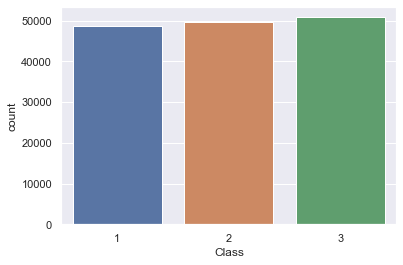

In [10]:
sns.countplot(df_train['Class'])

In [11]:
df_train.groupby('Department')['Class'].value_counts(normalize=True)

Department                      Class
AAM Asian Art Museum            2        0.442509
                                1        0.414634
                                3        0.142857
ADM Gen Svcs Agency-City Admin  2        0.389155
                                1        0.360978
                                           ...   
WTR Water Enterprise            2        0.286907
                                1        0.241483
WWE Wastewater Enterprise       3        0.536916
                                1        0.237383
                                2        0.225701
Name: Class, Length: 166, dtype: float64

In [12]:
df_train.describe()

,ID,Year,Organization Group Code,Union Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
count,149087.000000,149087.000000,149087.00000,149087.000000,149087.000000,149087.000000,149087.000000,149087.000000,149087.000000,149087.000000,149087.000000,149087.000000
mean,106616.273807,2015.072018,2.97698,491.154963,28508.984465,4511.488439,3754.638895,12632.395320,9058.531893,4720.552627,26411.479840,2.014347
std,61550.046783,1.410452,1.58208,333.914881,16460.652590,11361.792998,7516.445237,9657.913757,5024.486147,3933.772085,16893.424789,0.816750
min,0.000000,2013.000000,1.00000,1.000000,1.000000,-12308.660000,-19131.100000,-28723.190000,-2946.530000,-9857.740000,-19814.440000,1.000000
25%,53204.500000,2014.000000,2.00000,216.000000,14244.000000,0.000000,0.000000,3228.975000,4274.930000,1578.475000,9313.965000,1.000000
50%,106623.000000,2015.000000,2.00000,535.000000,28520.000000,0.000000,698.350000,12839.710000,12137.400000,4395.510000,30311.560000,2.000000
75%,159919.500000,2016.000000,4.00000,790.000000,42804.500000,2872.240000,4558.190000,19137.745000,12828.180000,6943.835000,38510.300000,3.000000
max,213201.000000,2017.000000,7.00000,990.000000,56987.000000,227313.620000,336726.340000,101306.010000,22052.150000,36815.390000,138503.520000,3.000000


In [13]:
#Unique Value in Job Column
df_train['Job'].unique()

array(['Senior Eligibility Worker', 'Sr Personal Property Auditor',
       'Social Worker', ..., 'Chief Deputy Sheriff (PERS)',
       'Parking Hearing Supervisor', 'Asst Chf, Bur Clm Invest&Admin'],
      dtype=object)

In [14]:
df_train.groupby('Job')['Union'].max()

Job
Account Clerk                                    SEIU - Miscellaneous, Local 1021
Accountant I                      Prof & Tech Engineers - Miscellaneous, Local 21
Accountant II                     Prof & Tech Engineers - Miscellaneous, Local 21
Accountant II (OCII)                             SEIU - Miscellaneous, Local 1021
Accountant III                    Prof & Tech Engineers - Miscellaneous, Local 21
                                                       ...                       
Wireropecable Maint Mech Train                     Stationary Engineers, Local 39
Worker's Comp Supervisor 1                       SEIU - Miscellaneous, Local 1021
Worker's Compensation Adjuster                   SEIU - Miscellaneous, Local 1021
X-Ray Laboratory Aide                           SEIU - Health Workers, Local 1021
Youth Comm Advisor                    Prof & Tech Engineers - Personnel, Local 21
Name: Union, Length: 1146, dtype: object

In [86]:
# No. of job by post
df_train['Job'].value_counts()[:10]

1086    9092
973     5321
842     4653
766     2936
442     2931
307     2926
829     2922
828     2918
764     2630
838     2574
Name: Job, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

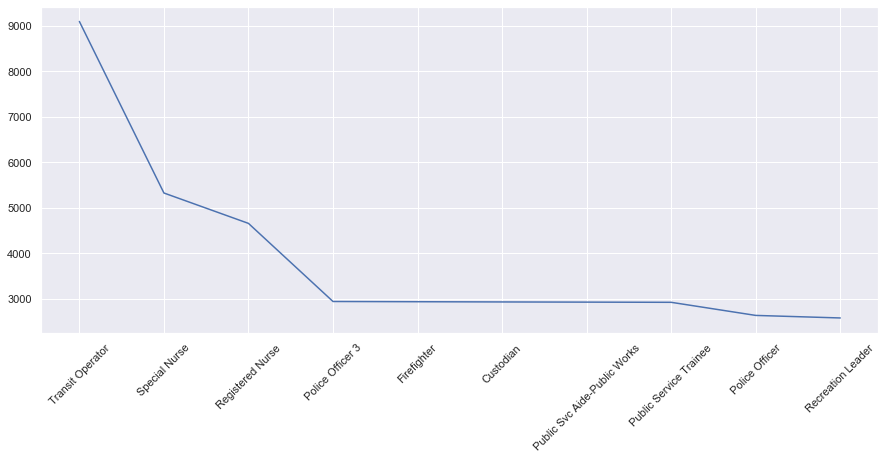

In [16]:
plt.figure(figsize=(15,6))
plt.plot(df_train['Job'].value_counts()[:10])
plt.xticks(rotation=45)

In [17]:
df_train['Union'].value_counts()[:10]

SEIU - Miscellaneous, Local 1021                      42544
Prof & Tech Engineers - Miscellaneous, Local 21       19292
SEIU - Staff and Per Diem Nurses, Local 1021          11187
Police Officers' Association                           9812
Transport Workers - Transit Operators, Local 250-A     9092
SEIU - Health Workers, Local 1021                      8275
SEIU - Human Services, Local 1021                      6441
Firefighters - Miscellaneous, Local 798                5517
Municipal Executive Association - Miscellaneous        4402
Laborers, Local 261                                    3692
Name: Union, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

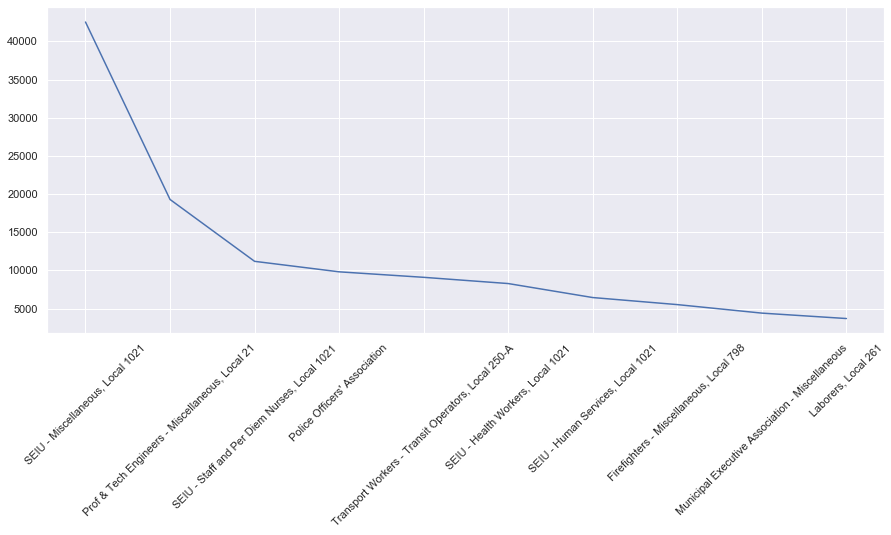

In [18]:
plt.figure(figsize=(15,6))
plt.plot(df_train['Union'].value_counts()[:10])
plt.xticks(rotation=45)

In [89]:
df_train.groupby('Class')['Overtime'].max()

Class
1     53895.92
2    117144.84
3    227313.62
Name: Overtime, dtype: float64

(array([   0,    1,    2, ..., 1143, 1144, 1145]),
 <a list of 1146 Text xticklabel objects>)

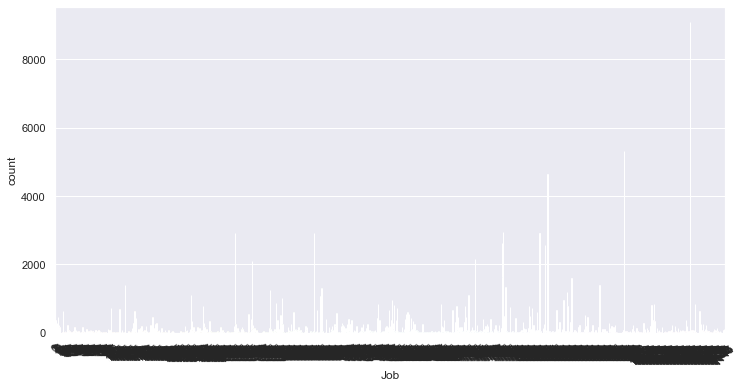

In [87]:
plt.figure(figsize=(12,6))
sns.countplot(df_train['Job'])
plt.xticks(rotation=45)

In [20]:
df_train.groupby("Class")['Job'].max()

Class
1                Youth Comm Advisor
2                Youth Comm Advisor
3    Worker's Compensation Adjuster
Name: Job, dtype: object

In [21]:
df_youth=df_train.loc[df_train['Job'] == "Youth Comm Advisor"]

In [22]:
mean_class_wise = df_youth.groupby("Class")["Total Benefits"].mean()
mean_class_wise

Class
1     7120.025
2    23886.660
Name: Total Benefits, dtype: float64

In [23]:
df_train.groupby("Class")["Health/Dental"].mean()

Class
1     2810.023086
2    11475.992954
3    12683.961075
Name: Health/Dental, dtype: float64

In [24]:
df_train.drop(['ID' ,'Year' ,'Year Type','Organization Group Code','Department Code','Union Code','Job Family Code','Job Code','Employee Identifier','Total Benefits'],1,inplace=True)

In [25]:
df_train.columns

Index(['Organization Group', 'Department', 'Union', 'Job Family', 'Job',
       'Overtime', 'Other Salaries', 'Retirement', 'Health/Dental',
       'Other Benefits', 'Class'],
      dtype='object')

## Label Encoding
- Organization Group
- Department
- Union
- Job Family

In [28]:
le = LabelEncoder()

In [29]:
le.fit(df_train['Organization Group'])
df_train['Organization Group'] = le.transform(df_train['Organization Group'])
       
le.fit(df_train['Department'])
df_train['Department'] = le.transform(df_train['Department'])
             
le.fit(df_train['Union'])
df_train['Union'] = le.transform(df_train['Union'])
       
le.fit(df_train['Job Family'])
df_train['Job Family'] = le.transform(df_train['Job Family'])

le.fit(df_train['Job'])
df_train['Job'] = le.transform(df_train['Job'])

In [30]:
df_train.head()

,Organization Group,Department,Union,Job Family,Job,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Class
0,4,34,61,21,883,0.00,240.00,11896.36,13765.55,5248.43,2
1,2,5,55,6,1007,0.00,400.00,15429.94,9337.37,5599.01,2
2,4,34,61,21,957,0.00,1080.00,9682.00,8848.03,3463.92,2
3,5,27,18,17,442,25730.46,18414.18,24222.26,13911.13,2416.58,3
4,6,39,62,34,782,1138.28,2148.11,15437.62,12828.15,7246.54,3


In [31]:
X = df_train[['Organization Group', 'Department', 'Union', 'Job Family', 'Job',
       'Overtime', 'Other Salaries', 'Retirement', 'Health/Dental',
       'Other Benefits']]

In [64]:
y = df_train["Class"]

In [65]:
train_X,test_X,train_y, test_y =train_test_split(X, y , test_size = 0.2,random_state = 0)

In [72]:
rf = Rf(n_estimators =10)

In [73]:
rf.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
predict_y = rf.predict(test_X)

In [85]:
print(f'Confusion Matrix: \n {confusion_matrix(test_y,predict_y)}')

Confusion Matrix: 
 [[9803   75    4]
 [ 134 9600  113]
 [   9  198 9882]]


In [80]:
print(f"Train Accuracy Score : {accuracy_score(test_y,predict_y)}")

Train Accuracy Score : 0.982124891005433


In [84]:
print(f'Classification Report : \n\n {classification_report(test_y,predict_y)}')

Classification Report : 

               precision    recall  f1-score   support

           1       0.99      0.99      0.99      9882
           2       0.97      0.97      0.97      9847
           3       0.99      0.98      0.98     10089

    accuracy                           0.98     29818
   macro avg       0.98      0.98      0.98     29818
weighted avg       0.98      0.98      0.98     29818

